In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

import plotly.express as px



In [2]:
price_df=pd.read_csv('listing_df1.csv')

In [4]:
price_df.columns

Index(['Unnamed: 0', 'Id', 'Name', 'summary', 'Longitude', 'Latitude', 'Space',
       'Description', 'Neighborhood', 'Host Id', 'Host Name',
       'Host Response Time', 'Street', 'Suburban', 'Government Area', 'Market',
       'Country', 'Rating', 'Property Type', 'Room Type', 'Accomodates',
       'Bathrooms', 'Bedrooms', 'beds', 'Amenities', 'Cancellation Policy',
       'Minumum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability_90', 'Availability_365',
       'No of Reviews', 'Price', 'City', 'State'],
      dtype='object')

In [5]:
# Remove listings with 0 for  bedrooms, bathrooms, accomodates, price, beds, review_scores_rating, reviews_per_monthprice_df = price_df[price_df.Bedrooms > 0]
price_df=  price_df[price_df.Bathrooms > 0]
price_df = price_df[price_df['Accomodates'] > 0]
price_df = price_df[price_df.Price > 0]
price_df = price_df[price_df.beds > 0]
price_df = price_df[price_df['No of Reviews'] > 0]
price_df=price_df[price_df.Bedrooms > 0]


price_df.head()

,Unnamed: 0,Id,Name,summary,Longitude,Latitude,Space,Description,Neighborhood,Host Id,...,Minumum Nights,Maximum Nights,Availability 30,Availability 60,Availability_90,Availability_365,No of Reviews,Price,City,State
0,0,1003530,New York City - Upper West Side Apt,Not Provided,-73.96523,40.79962,"Murphy bed, optional second bedroom available....","Murphy bed, optional second bedroom available....",Great neighborhood - many terrific restaurants...,454250,...,12,360,0,0,0,93,70,135.0,New York,New York
1,1,10133554,Double and triple rooms Blue mosque,Not Provided,28.98009,41.00620,We are on the central city Blue mosque 5 minu...,We are on the central city Blue mosque 5 minu...,Cankurtaran mahallesi akbıyık caddesi no 22 Su...,52004703,...,1,1125,30,60,90,365,29,121.0,Fatih,Istanbul
2,2,10059872,"Soho Cozy, Spacious and Convenient","Clean, fully furnish, Spacious 1 bedroom flat ...",114.15027,22.28158,Not Provided,"Clean, fully furnish, Spacious 1 bedroom flat ...",Not Provided,51624384,...,4,20,0,0,0,0,3,699.0,Hong Kong,Hong Kong
3,3,10084023,City center private room with bed,House is located 5mins walk from Sham Shui Po ...,114.16690,22.33140,"The house is old fashion type, and paint the w...",House is located 5mins walk from Sham Shui Po ...,"Cheapest food, electronic device, clothing and...",51744313,...,1,500,14,24,40,220,81,181.0,Hong Kong,Hong Kong
6,6,10096773,Easy 1 Bedroom in Chelsea,A comfortable one bedroom for responsible gues...,-74.00074,40.74577,*I listed this place late so can be flexible f...,A comfortable one bedroom for responsible gues...,Chelsea is considered a high end neighborhood ...,34607505,...,2,1125,0,0,0,0,1,145.0,New York,New York


In [6]:
price_df.drop(columns='Unnamed: 0',inplace=True)

# Data cleaning

In [7]:
price_df.describe()

,Id,Longitude,Latitude,Host Id,Rating,Accomodates,Bathrooms,Bedrooms,beds,Minumum Nights,Maximum Nights,Availability 30,Availability 60,Availability_90,Availability_365,No of Reviews,Price
count,3.753000e+03,3753.000000,3753.000000,3.753000e+03,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3.753000e+03,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000,3753.000000
mean,1.532355e+07,-9.728890,22.621848,5.778769e+07,93.080349,3.671729,1.298961,1.538236,2.165468,4.751132,1.474162e+06,11.047962,25.128431,41.130029,172.633893,35.721290,231.397549
std,9.288519e+06,92.658662,27.966059,6.328627e+07,8.879920,2.315907,0.677770,0.975276,1.652859,24.114419,5.350053e+07,11.027314,22.188174,33.385184,135.505796,53.108838,455.379365
min,1.170800e+04,-159.547450,-34.088290,2.787000e+03,20.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000
25%,6.958924e+06,-73.762100,20.794260,8.368066e+06,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000e+01,0.000000,0.000000,3.000000,29.000000,3.000000,65.000000
50%,1.592385e+07,-8.617970,40.724780,3.129780e+07,95.000000,3.000000,1.000000,1.000000,2.000000,2.000000,1.125000e+03,8.000000,22.000000,41.000000,172.000000,13.000000,120.000000
75%,2.297854e+07,28.989940,41.337140,9.045353e+07,99.000000,4.000000,1.500000,2.000000,3.000000,3.000000,1.125000e+03,21.000000,46.000000,73.000000,310.000000,45.000000,250.000000
max,3.283907e+07,151.338980,45.665630,2.467295e+08,100.000000,16.000000,16.000000,20.000000,25.000000,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,469.000000,11681.000000


In [8]:
price_df['Price'].isna().sum()

np.int64(0)

In [9]:
price_df['Property Type'].isna().sum()

np.int64(0)

In [10]:
price_df['Room Type'].isnull().sum()

np.int64(0)

In [11]:
price_df['Bedrooms'].isna().sum()

np.int64(0)

In [12]:
price_df['No of Reviews'].isna().sum()

np.int64(0)

In [13]:
price_df['Price'].isna().sum()

np.int64(0)

In [14]:
price_df['Rating'].isna().sum()

np.int64(0)

In [15]:
price_df['Country'].isna().sum()

np.int64(3)

In [16]:
price_df['City'].isna().sum()

np.int64(0)

In [17]:
price_df.loc[price_df['State'].isna(),['Country','State','City']]

,Country,State,City


In [18]:
price_df['State'].fillna('Hong Kong',inplace=True)

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\2731150355.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  price_df['State'].fillna('Hong Kong',inplace=True)


In [19]:
price_df['State'].isna().sum()

np.int64(0)

In [20]:
price_df.loc[price_df['Name'].isna(),['Host Name','City','Name']]

,Host Name,City,Name
287,Louis-Philippe,Montréal,NaN


In [21]:
price_df['Name'].fillna('Unknown',inplace=True)

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\2354081553.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  price_df['Name'].fillna('Unknown',inplace=True)


In [22]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3753 entries, 0 to 5552
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   3753 non-null   int64  
 1   Name                 3753 non-null   object 
 2   summary              3753 non-null   object 
 3   Longitude            3753 non-null   float64
 4   Latitude             3753 non-null   float64
 5   Space                3753 non-null   object 
 6   Description          3753 non-null   object 
 7   Neighborhood         3753 non-null   object 
 8   Host Id              3753 non-null   int64  
 9   Host Name            3753 non-null   object 
 10  Host Response Time   3753 non-null   object 
 11  Street               3753 non-null   object 
 12  Suburban             3147 non-null   object 
 13  Government Area      3753 non-null   object 
 14  Market               3750 non-null   object 
 15  Country              3750 non-null   object

In [23]:
price_df['Room Type']=price_df['Room Type'].astype('category')

# Analysis

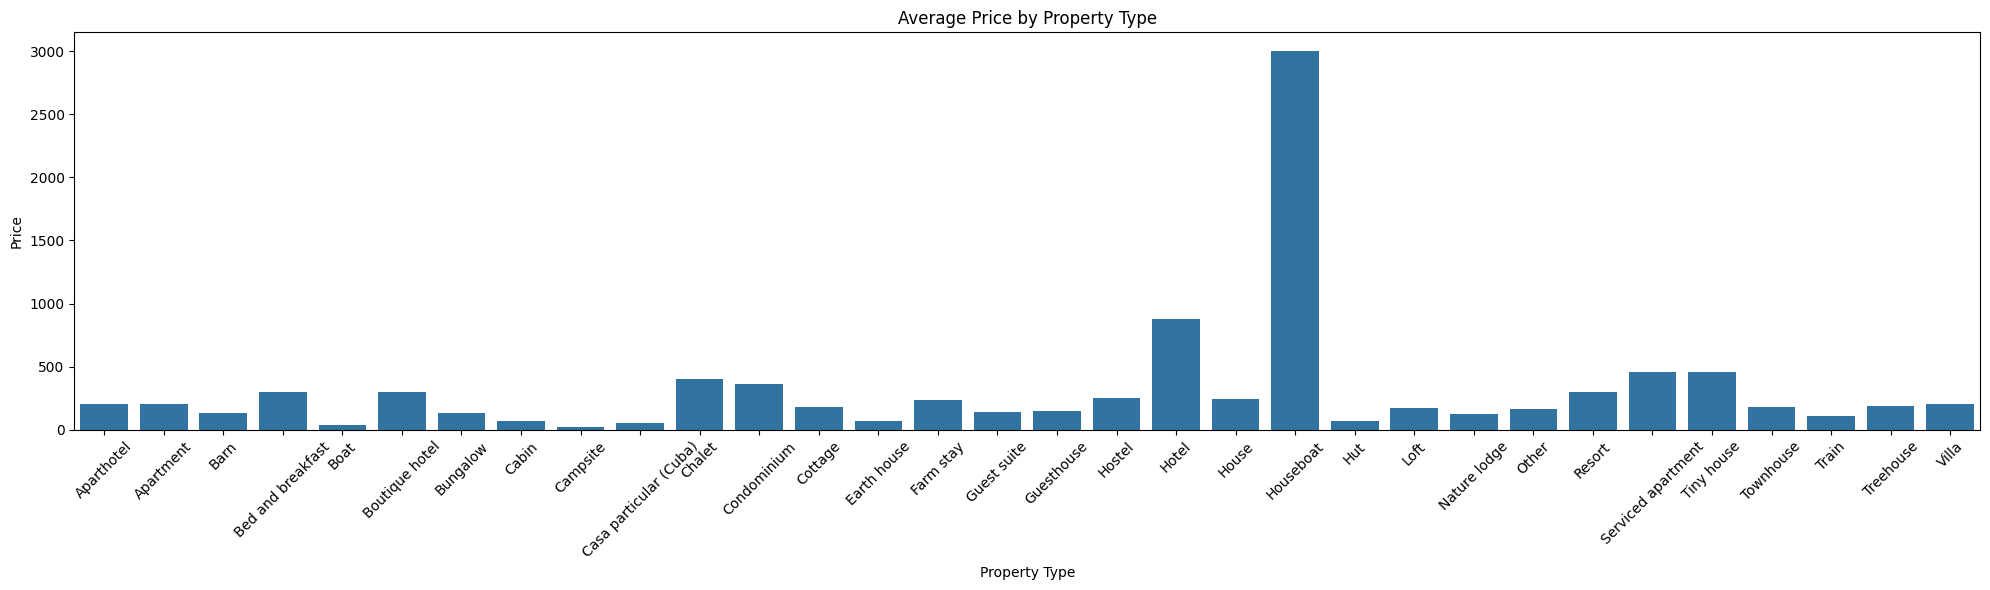

In [24]:
plt.figure(figsize=(20, 6))

# Calculate average price by property type
avg_price_by_property = price_df.groupby('Property Type')['Price'].mean().reset_index()

# Create bar plot to show average price per property type
sns.barplot(x='Property Type', y='Price', data=avg_price_by_property)
plt.xticks(rotation=45)
plt.title('Average Price by Property Type')
plt.tight_layout()
plt.show()


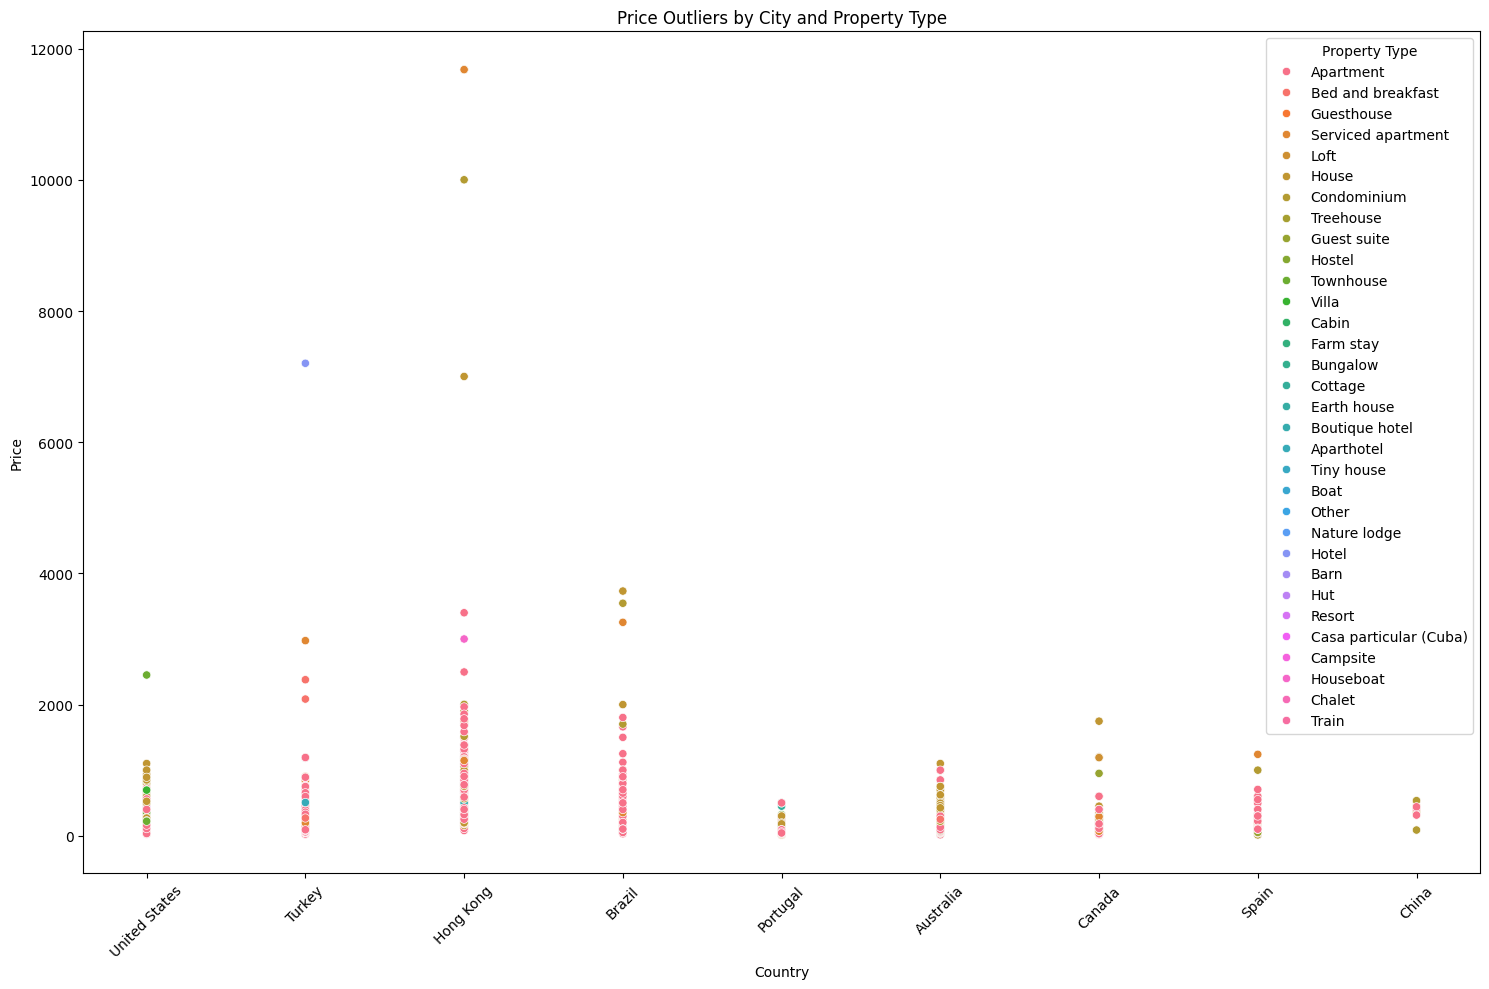

In [25]:
plt.figure(figsize=(15, 10))

# Create scatter plot to show prices with respect to property type and city
sns.scatterplot(x='Country', y='Price', hue='Property Type', data=price_df)
plt.xticks(rotation=45)
plt.title('Price Outliers by City and Property Type')
plt.tight_layout()
plt.show()


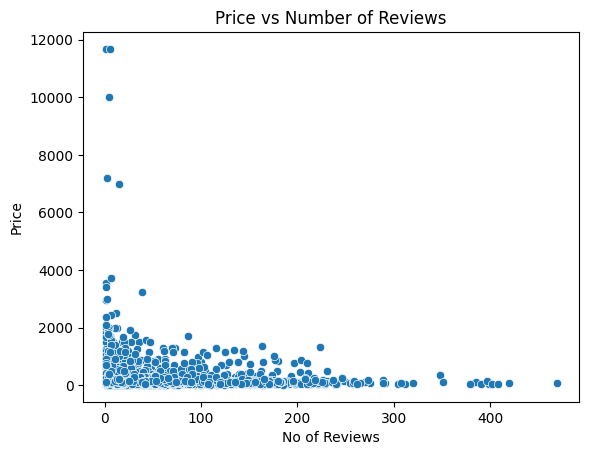

Correlation between Price and Number of Reviews: -0.07279055885800731


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr



# Price vs Number of Reviews
sns.scatterplot(x='No of Reviews', y='Price', data=price_df)
plt.title('Price vs Number of Reviews')
plt.show()

# Correlation between Price and Number of Reviews
corr_price_reviews, _ = pearsonr(price_df['Price'], price_df['No of Reviews'])
print(f"Correlation between Price and Number of Reviews: {corr_price_reviews}")

# Repeat for Price and Bedrooms, Price and Rating, etc.


In [27]:
# Calculate correlation between Price and Rating
corr_price_rating, _ = pearsonr(price_df['Price'], price_df['Rating'])
print(f"Correlation between Price and Rating: {corr_price_rating}")


Correlation between Price and Rating: -0.025254878986179657


In [28]:
# Calculate correlation between Price and Bedrooms
corr_price_bedrooms, _ = pearsonr(price_df['Price'], price_df['Bedrooms'])
print(f"Correlation between Price and Bedrooms: {corr_price_bedrooms}")


Correlation between Price and Bedrooms: 0.19282256245620305


In [29]:
#Finding outliers

# Calculate the Interquartile Range (IQR)
Q1 = price_df['Price'].quantile(0.25)
Q3 = price_df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those outside 1.5 * IQR
outliers = price_df[(price_df['Price'] < (Q1 - 1.5 * IQR)) | (price_df['Price'] > (Q3 + 1.5 * IQR))]


                 Id   Longitude    Latitude       Host Id      Rating  \
count  3.460000e+02  346.000000  346.000000  3.460000e+02  346.000000   
mean   1.520052e+07   57.805047   15.957297  5.071480e+07   92.743492   
std    9.580964e+06   90.037247   21.204989  6.039130e+07    9.564479   
min    4.830500e+04 -159.547450  -34.051440  7.093300e+04   20.000000   
25%    6.438081e+06    2.163858   21.739280  8.064595e+06   90.000000   
50%    1.514176e+07  114.150195   22.284220  2.519999e+07   95.500000   
75%    2.324864e+07  114.172890   22.311443  6.831922e+07  100.000000   
max    3.241868e+07  151.332190   45.653110  2.405262e+08  100.000000   

       Accomodates   Bathrooms    Bedrooms        beds  Minumum Nights  \
count   346.000000  346.000000  346.000000  346.000000      346.000000   
mean      5.225434    1.645954    2.078035    3.109827        3.479769   
std       2.962772    1.082642    1.299825    2.153411        5.651820   
min       1.000000    0.500000    1.000000    

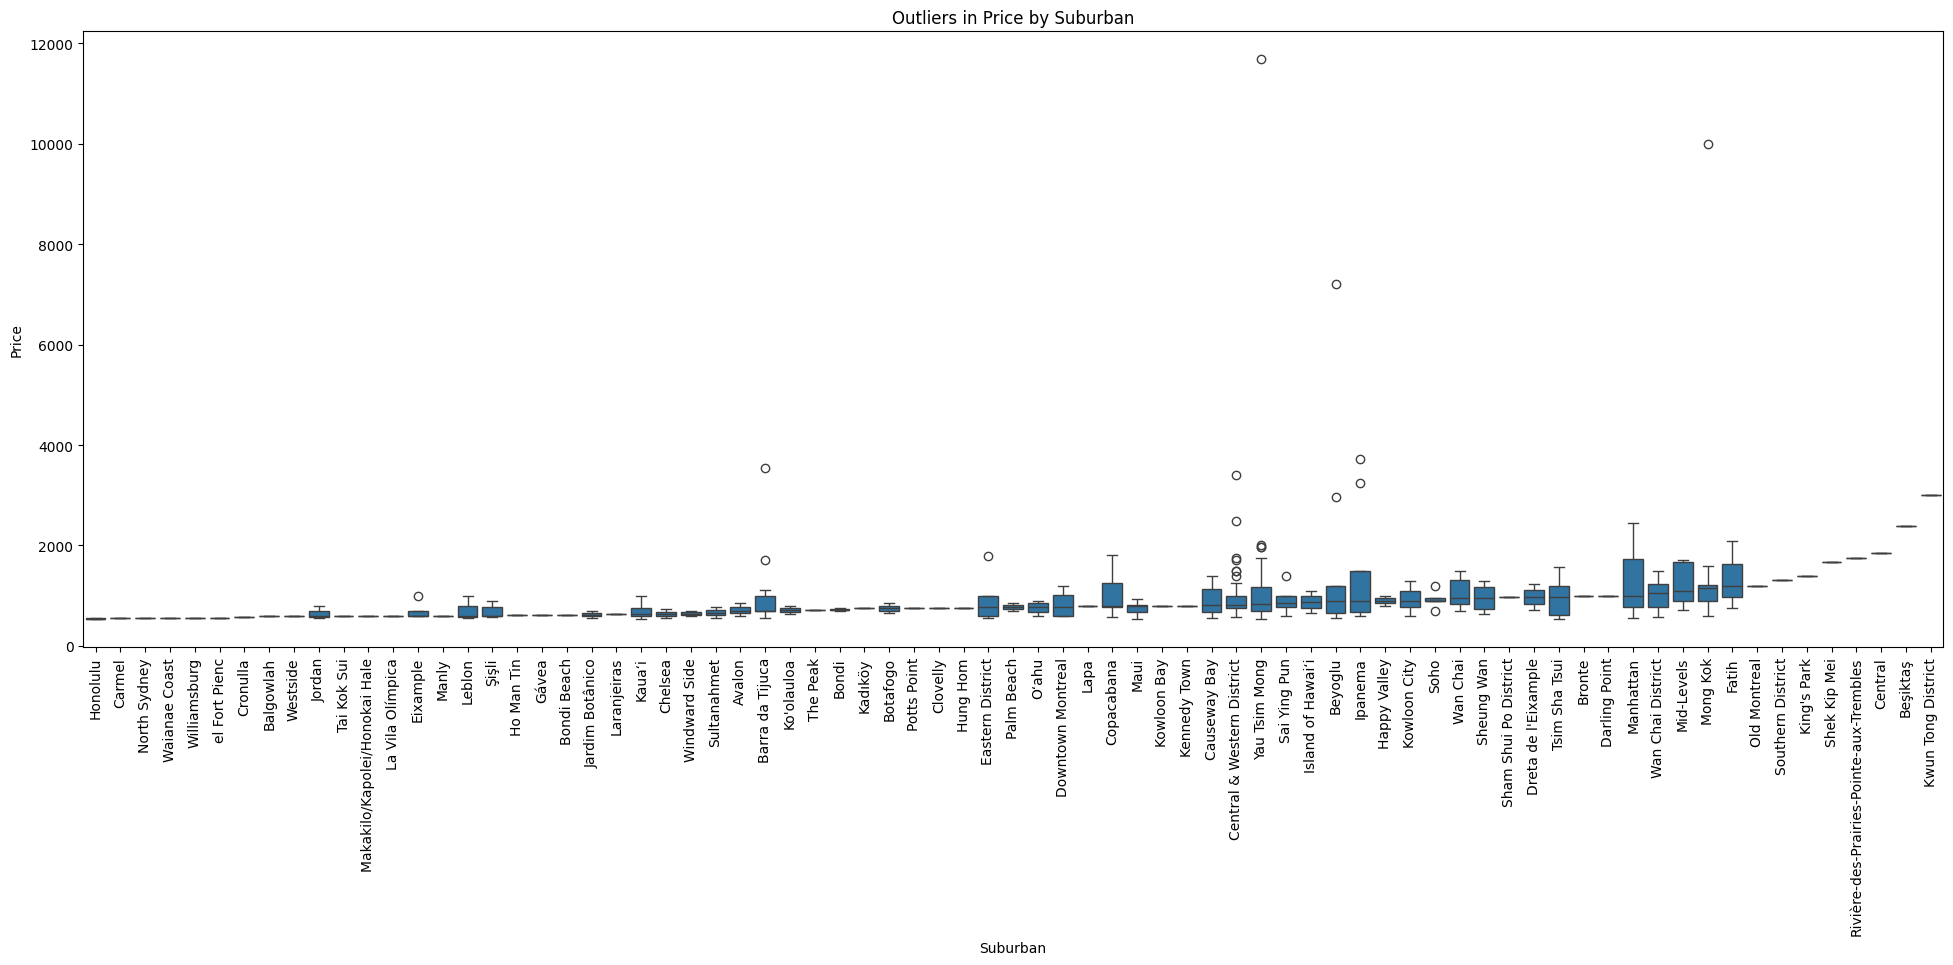

In [30]:
# Extract the outliers
outliers = price_df[(price_df['Price'] < (Q1 - 1.5 * IQR)) | (price_df['Price'] > (Q3 + 1.5 * IQR))]

# Basic statistics for outliers
print(outliers.describe())

# Adjust the figure size
plt.figure(figsize=(24, 8))

# Visualize outliers with sorted cities
sns.boxplot(x='Suburban', y='Price', data=outliers, order=outliers.groupby('Suburban')['Price'].median().sort_values().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title and labels
plt.title('Outliers in Price by Suburban')
plt.xlabel('Suburban')
plt.ylabel('Price')

# Show the plot
plt.show()



                 Id   Longitude    Latitude       Host Id      Rating  \
count  3.460000e+02  346.000000  346.000000  3.460000e+02  346.000000   
mean   1.520052e+07   57.805047   15.957297  5.071480e+07   92.743492   
std    9.580964e+06   90.037247   21.204989  6.039130e+07    9.564479   
min    4.830500e+04 -159.547450  -34.051440  7.093300e+04   20.000000   
25%    6.438081e+06    2.163858   21.739280  8.064595e+06   90.000000   
50%    1.514176e+07  114.150195   22.284220  2.519999e+07   95.500000   
75%    2.324864e+07  114.172890   22.311443  6.831922e+07  100.000000   
max    3.241868e+07  151.332190   45.653110  2.405262e+08  100.000000   

       Accomodates   Bathrooms    Bedrooms        beds  Minumum Nights  \
count   346.000000  346.000000  346.000000  346.000000      346.000000   
mean      5.225434    1.645954    2.078035    3.109827        3.479769   
std       2.962772    1.082642    1.299825    2.153411        5.651820   
min       1.000000    0.500000    1.000000    

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\3986475079.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.boxplot(x='Room Type', y='Price', data=outliers, order=outliers.groupby('Room Type')['Price'].median().sort_values().index)


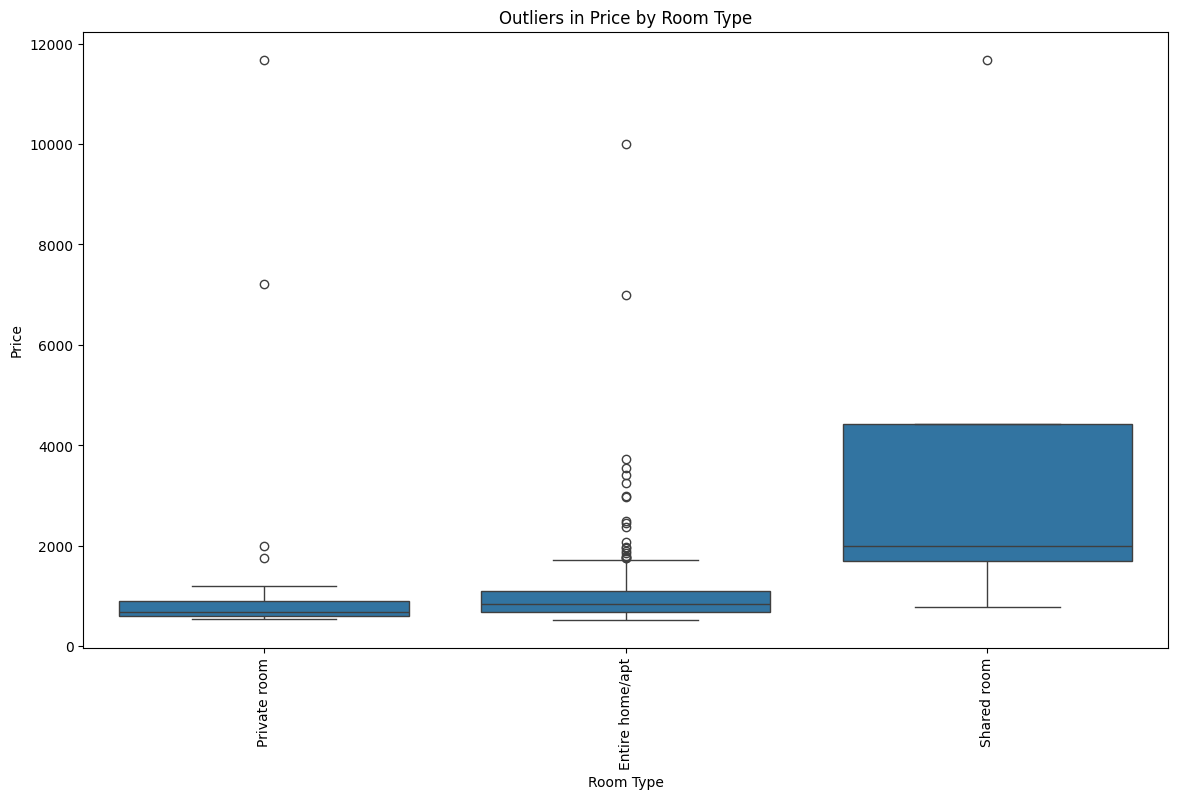

In [31]:
# Extract the outliers
outliers = price_df[(price_df['Price'] < (Q1 - 1.5 * IQR)) | (price_df['Price'] > (Q3 + 1.5 * IQR))]

# Basic statistics for outliers
print(outliers.describe())

# Adjust the figure size
plt.figure(figsize=(14, 8))

# Visualize outliers with sorted cities
sns.boxplot(x='Room Type', y='Price', data=outliers, order=outliers.groupby('Room Type')['Price'].median().sort_values().index)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set title and labels
plt.title('Outliers in Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')

# Show the plot
plt.show()



In [32]:
#Group by
# Group by Neighborhood to find average prices
price_by_City= price_df.groupby('Suburban')['Price'].mean().reset_index()

# Group by Property Type
price_by_property_type = price_df.groupby('Property Type')['Price'].mean().reset_index()

price_by_Room_type=price_df.groupby('Room Type')['Price'].mean().reset_index()

# Display the aggregated data
print(price_by_City)
print(price_by_property_type)
print(price_by_Room_type)



                              Suburban       Price
0                  Abbotsford/Wareemba   60.000000
1                Ahuntsic-Cartierville   94.625000
2                    Ala Moana/Kakaako   62.500000
3                           Alexandria  104.000000
4    Aliamanu/Salt Lake/Foster Village   79.000000
..                                 ...         ...
358                      Yau Tsim Mong  756.630137
359                            Zetland  156.400000
360                      el Fort Pienc  158.714286
361                            Üsküdar  112.000000
362                              Şişli  236.459459

[363 rows x 2 columns]
             Property Type        Price
0               Aparthotel   207.800000
1                Apartment   207.131930
2                     Barn   135.000000
3        Bed and breakfast   298.029412
4                     Boat    35.000000
5           Boutique hotel   298.266667
6                 Bungalow   136.777778
7                    Cabin    73.666667
8   

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\3075748622.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_by_Room_type=price_df.groupby('Room Type')['Price'].mean().reset_index()


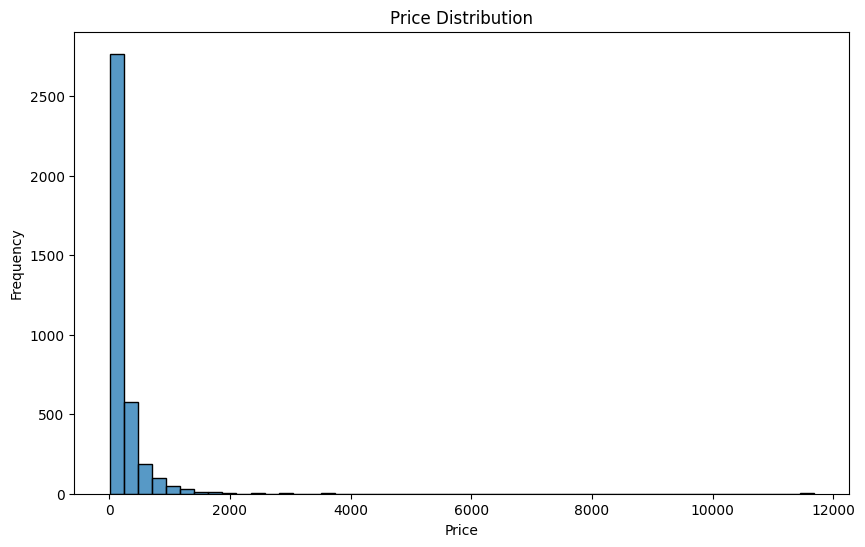

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\65483749.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(price_df['Price'], shade=True)


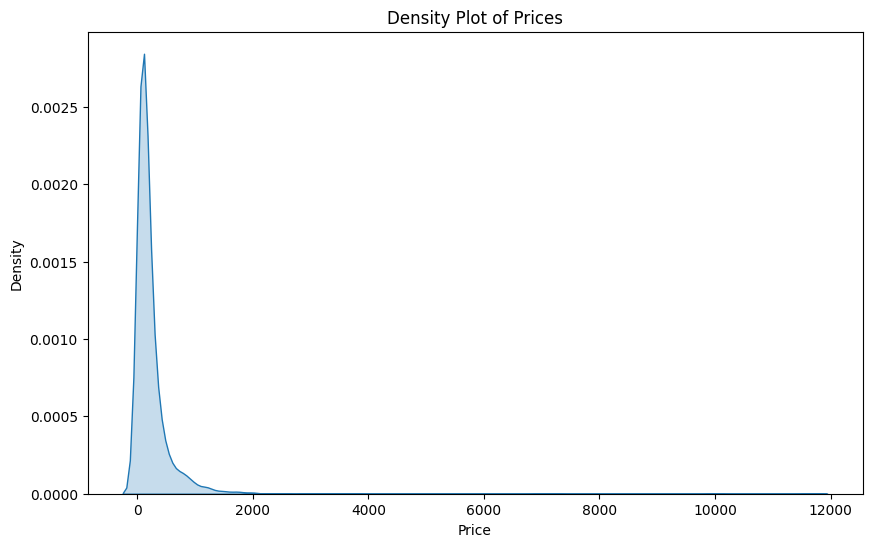

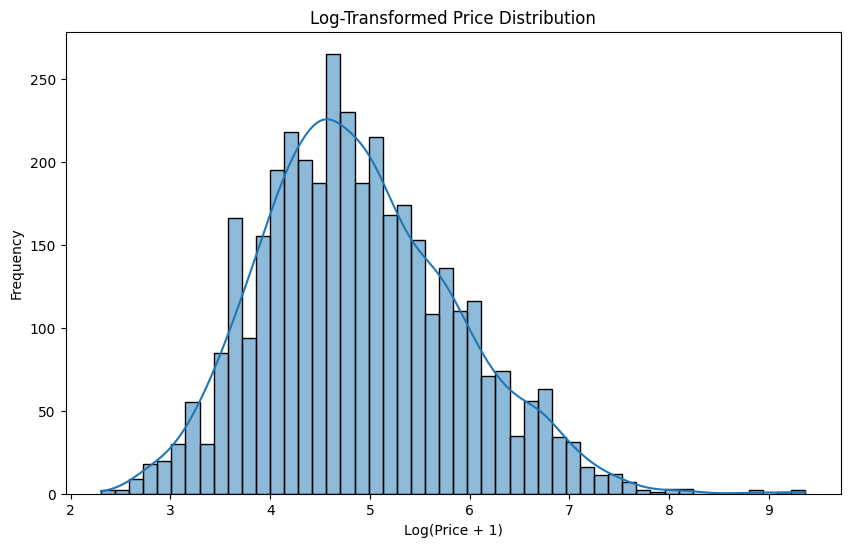

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(price_df['Price'], bins=50, kde=False)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plotting the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(price_df['Price'], shade=True)
plt.title('Density Plot of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Log transformation if the data is skewed
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(price_df['Price']), bins=50, kde=True)
plt.title('Log-Transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()


## Analyzing the listings based on room types. It is stated in AirBnB's website that they have 3 room types.

Number of room types : 3

Room Type
Entire home/apt    2399
Private room       1307
Shared room          47
Name: count, dtype: int64


C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\2628627476.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = "Room Type", data = price_df, kind = "count", palette="Set2")


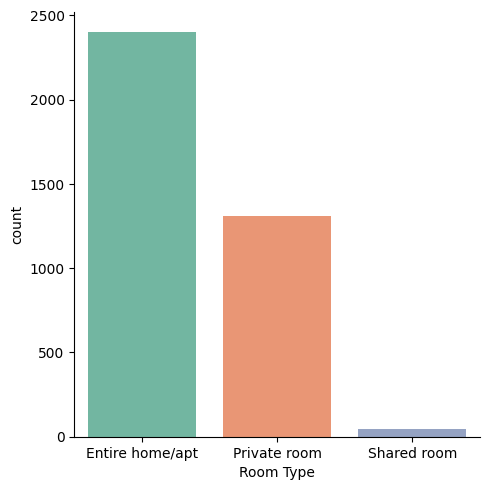

In [34]:
# Number of room types
print("Number of room types :", len(price_df["Room Type"].unique()))
print()

# Number of listings of each room type
print(price_df["Room Type"].value_counts())
sns.catplot(x = "Room Type", data = price_df, kind = "count", palette="Set2")

As it can be seen from the countplot, most of the listings are entire home/apt with private rooms being second and shared rooms being the least.


# Analyzing the listings based on the property type.

Number of property types: 32

Property Type
Apartment                 2471
House                      428
Condominium                264
Serviced apartment         110
Townhouse                   91
Loft                        88
Guest suite                 57
Guesthouse                  40
Bed and breakfast           34
Boutique hotel              30
Villa                       18
Hostel                      18
Cottage                     17
Aparthotel                  15
Hotel                       15
Cabin                       12
Bungalow                     9
Other                        7
Resort                       7
Farm stay                    6
Tiny house                   3
Casa particular (Cuba)       2
Nature lodge                 2
Treehouse                    1
Boat                         1
Earth house                  1
Hut                          1
Barn                         1
Campsite                     1
Houseboat                    1
Chalet                    

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\1129979349.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Property Type", data=price_df, kind="count", palette="Set2", height=8, aspect=3, order=price_df["Property Type"].value_counts().index)


<Figure size 2000x1000 with 0 Axes>

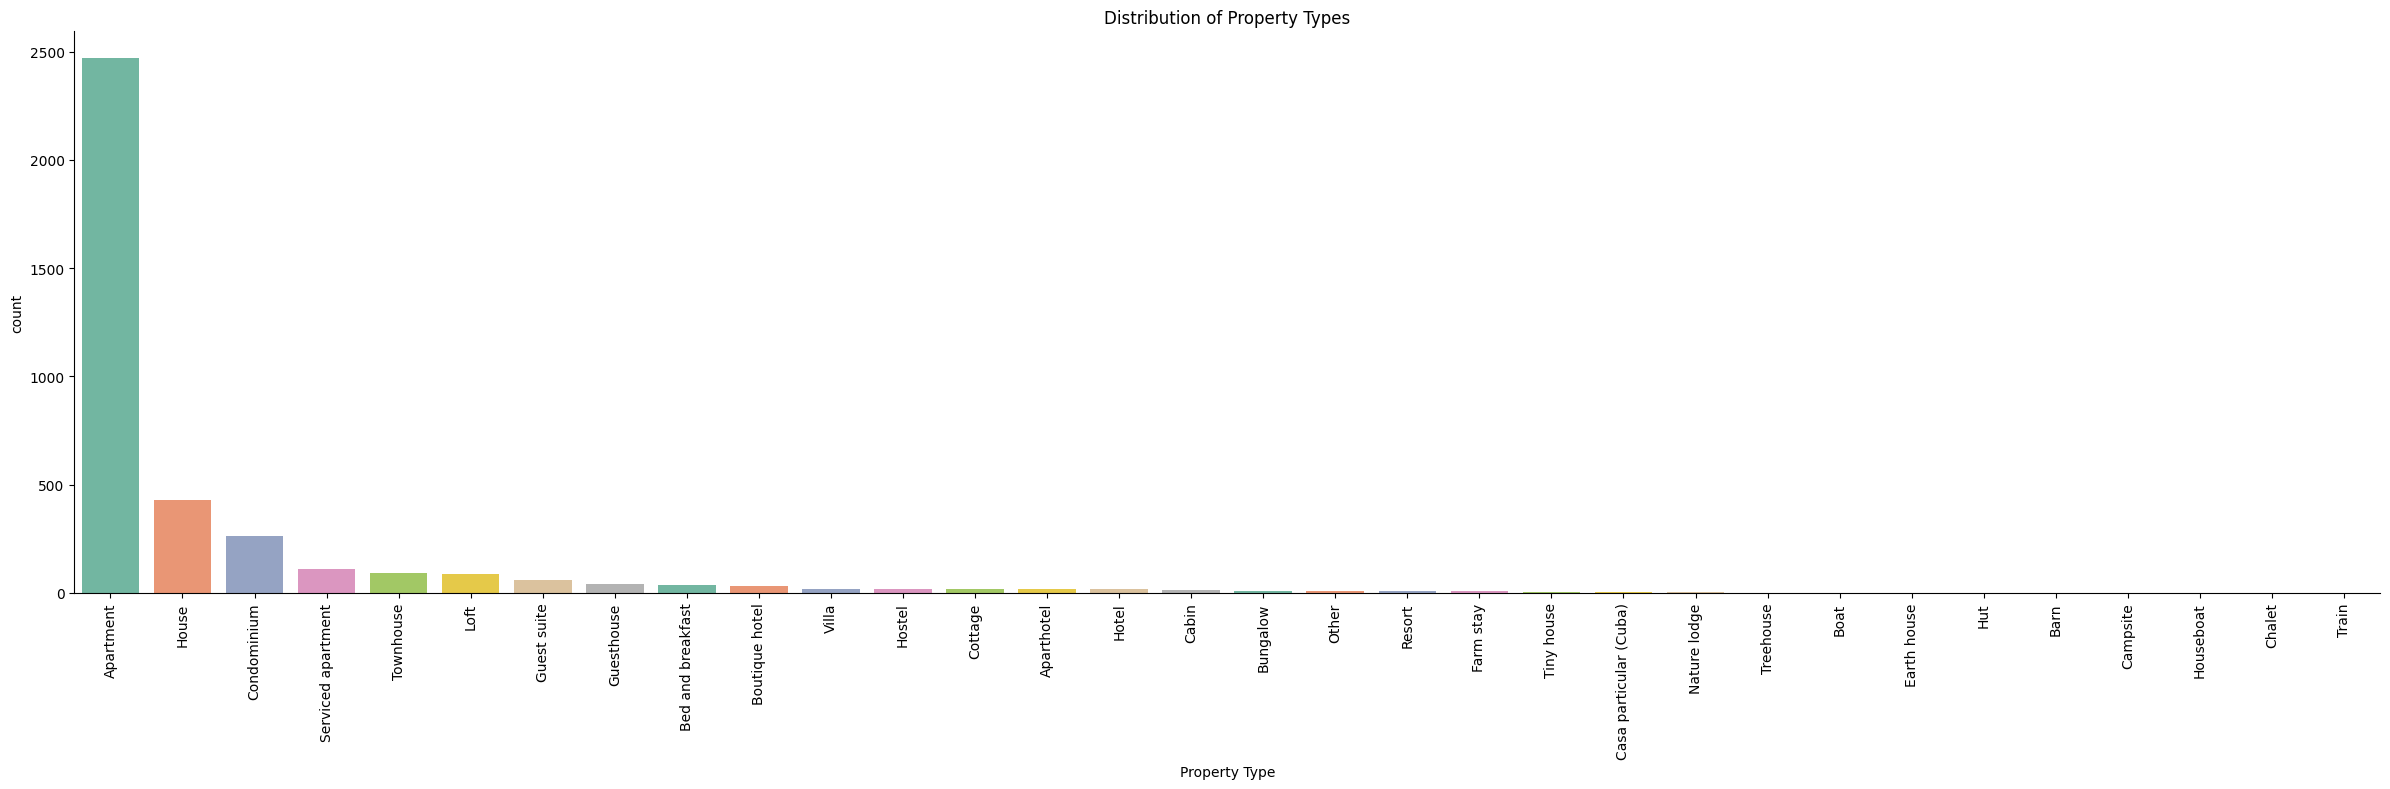

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Number of property types
print("Number of property types:", len(price_df["Property Type"].unique()))
print()

# Number of listings of each property type
print(price_df["Property Type"].value_counts())
print()

# Adjust the plot to show property types more clearly
plt.figure(figsize=(20,10))  # Increased figure size
sns.catplot(x="Property Type", data=price_df, kind="count", palette="Set2", height=8, aspect=3, order=price_df["Property Type"].value_counts().index)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.title("Distribution of Property Types")
plt.tight_layout()  # Ensure everything fits within the plot
plt.show()


From the above graph, we can see that there are a lot more listings of apartment and full houses than any other property type in seattle. Together with the earlier discovery that hosts prefer to list their full property than just a room or shared room, it can be inferred that most listings in Seattle are entire apartments or entire houses. Now lets analyze if these listing types have anything to do with the prices of the listings.

# Analyzing the prices for the different room and property types.

In [36]:
# Checking out the mean prices for the different room and property types
roomProperty_DF = price_df.groupby(['Property Type','Room Type','Suburban']).Price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('Price',ascending=[0])
roomProperty_DF.head()

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\1798184368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  roomProperty_DF = price_df.groupby(['Property Type','Room Type','Suburban']).Price.mean()


,Property Type,Room Type,Suburban,Price
19986,Hotel,Private room,Beyoglu,7203.000000
12198,Condominium,Entire home/apt,Mong Kok,3893.333333
20832,House,Entire home/apt,Ipanema,3730.000000
29035,Serviced apartment,Private room,Yau Tsim Mong,3195.000000
21949,Houseboat,Entire home/apt,Kwun Tong District,2999.000000


C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\3080842266.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(price_df.groupby(['Property Type', 'Room Type']).Price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})


<Axes: xlabel='Room Type', ylabel='Property Type'>

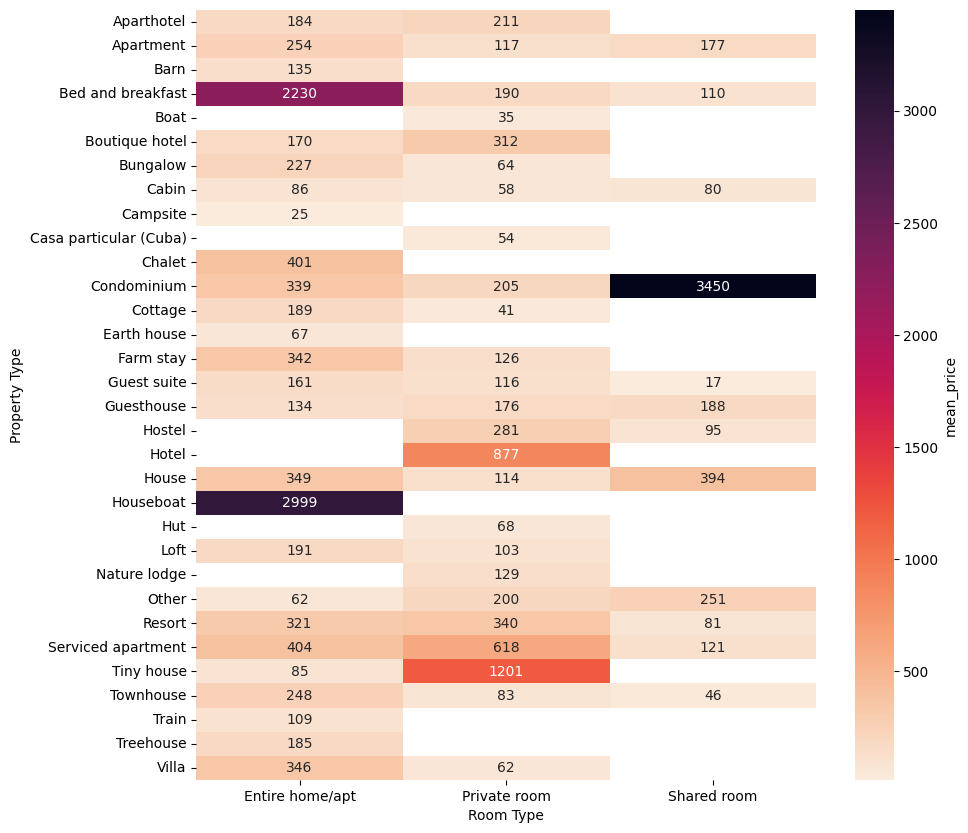

In [37]:

# Plotting a heatmap of the mean price for room type and a property type

plt.figure(figsize = (10,10))
sns.heatmap(price_df.groupby(['Property Type', 'Room Type']).Price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\3080842266.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(price_df.groupby(['Property Type', 'Room Type']).Price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})


<Axes: xlabel='Room Type', ylabel='Property Type'>

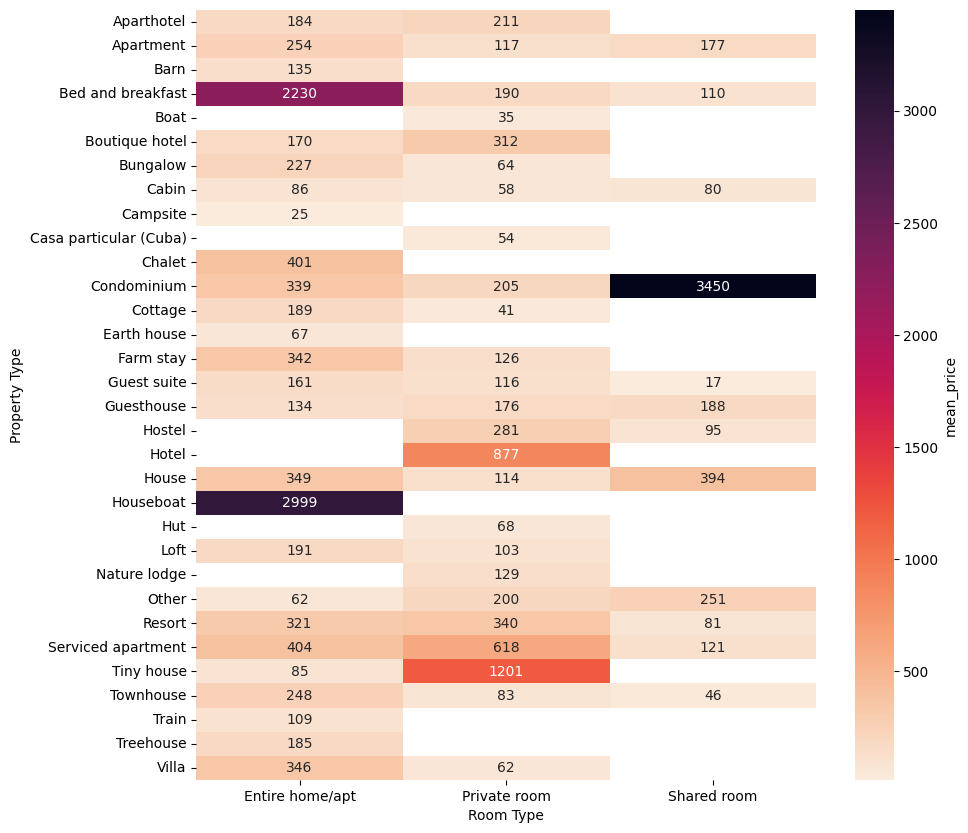

In [38]:

# Plotting a heatmap of the mean price for room type and a property type

plt.figure(figsize = (10,10))
sns.heatmap(price_df.groupby(['Property Type', 'Room Type']).Price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

The heatmap highlights the variation in prices across different property and room types, with luxury and unique property types (like Heritage hotels, Houseboats, and Condominiums) showing significantly higher prices.
More affordable property types, such as Hostels, Guesthouses, and Bungalows, provide budget-friendly options, while unique accommodations like Tiny Houses and Villas can still command higher prices for specific room types.


All of this tells us that the room_type and property_type both play a very important role in the final price of the listing.

## Anaylzing the listings based on the number of bedrooms.

<Axes: xlabel='Bedrooms', ylabel='Price'>

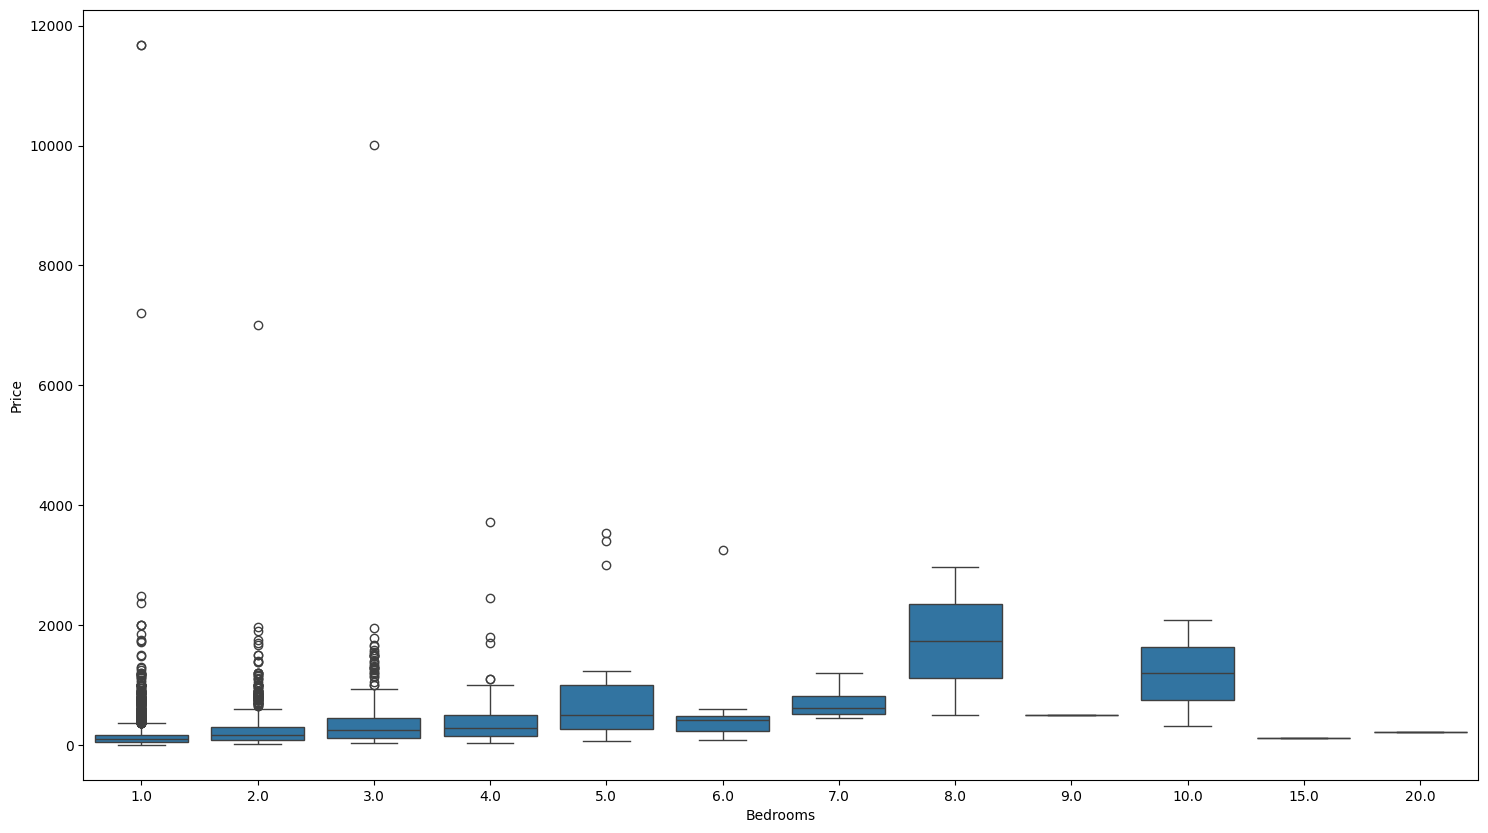

In [39]:
# Plotting a boxplot to quickly see if there is any trend between price and no. bedrooms
plt.figure(figsize=(18,10))
sns.boxplot(x='Bedrooms', y='Price', data=price_df[['Bedrooms', 'Price']])

1.Distribution of Listings by Number of Bedrooms:

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\3763901850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=price_df, x='Bedrooms', palette='coolwarm')


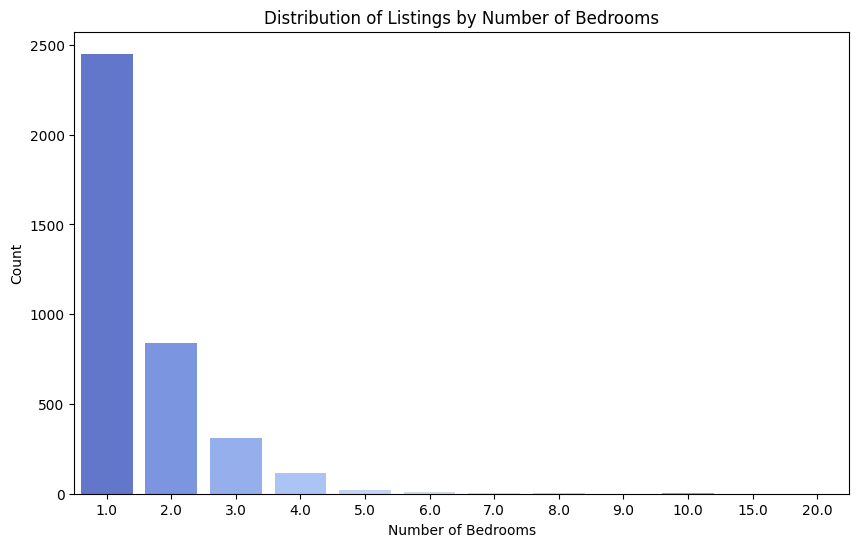

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=price_df, x='Bedrooms', palette='coolwarm')
plt.title('Distribution of Listings by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()


2.  Average price by number of Bedrooms

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\939985097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price_per_bedrooms, x='Bedrooms', y='Price', palette='viridis')


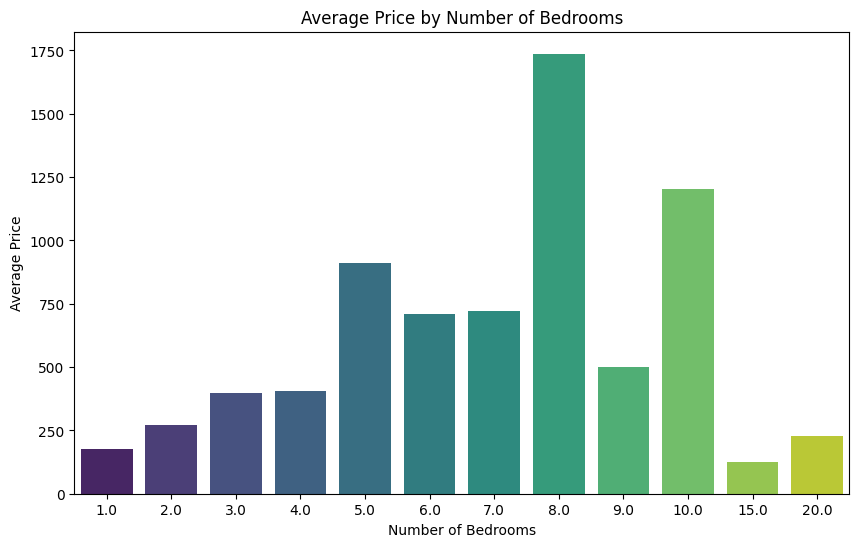

In [41]:
plt.figure(figsize=(10, 6))
avg_price_per_bedrooms = price_df.groupby('Bedrooms')['Price'].mean().reset_index()
sns.barplot(data=avg_price_per_bedrooms, x='Bedrooms', y='Price', palette='viridis')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


3.Room Type and number of Bedrooms

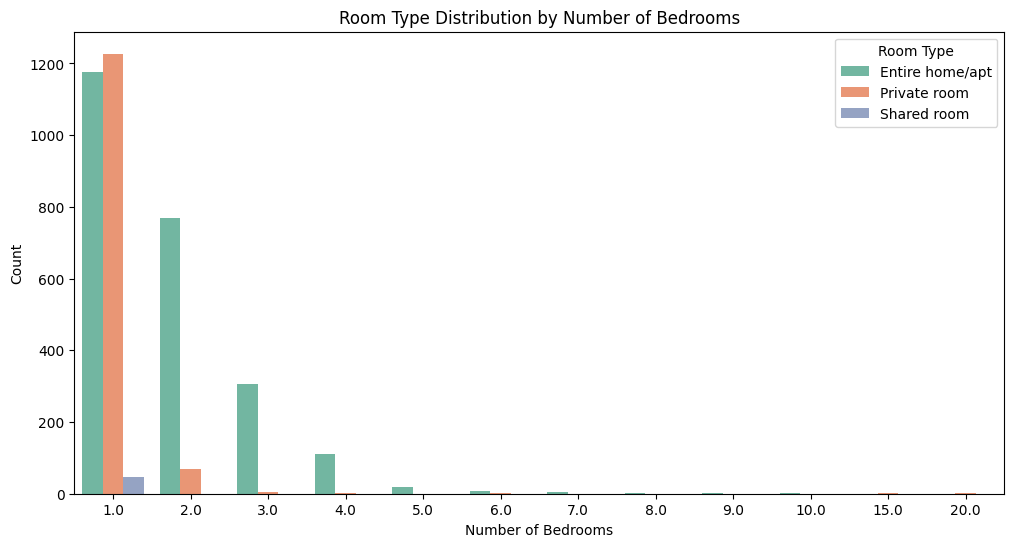

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=price_df, x='Bedrooms', hue='Room Type', palette='Set2')
plt.title('Room Type Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.legend(title='Room Type')
plt.show()


4.Availability of Listings by Number of Bedrooms:

C:\Users\nkn05\AppData\Local\Temp\ipykernel_33844\1304493827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_availability_per_bedrooms, x='Bedrooms', y='Availability_365', palette='flare')


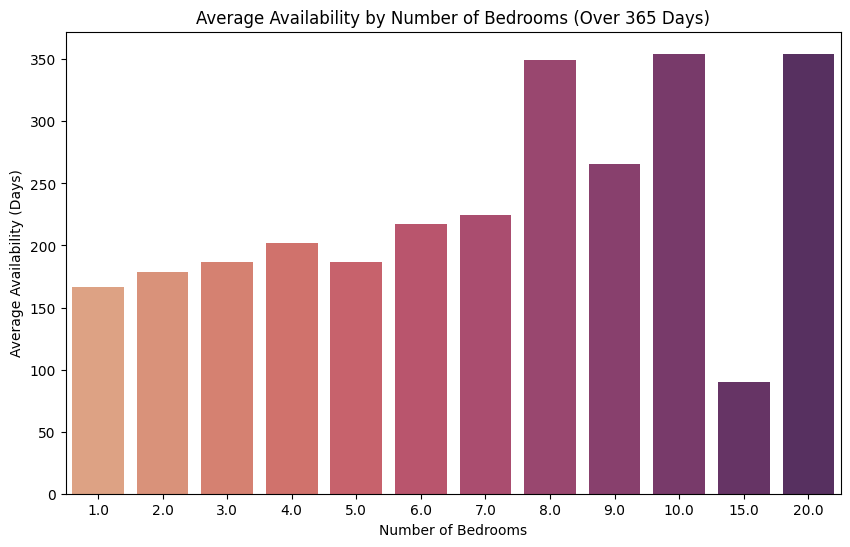

In [43]:
plt.figure(figsize=(10, 6))
avg_availability_per_bedrooms = price_df.groupby('Bedrooms')['Availability_365'].mean().reset_index()
sns.barplot(data=avg_availability_per_bedrooms, x='Bedrooms', y='Availability_365', palette='flare')
plt.title('Average Availability by Number of Bedrooms (Over 365 Days)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Availability (Days)')
plt.show()


Most Common Listings: The countplot will show if 1-bedroom or 2-bedroom listings dominate the dataset. Larger properties (e.g., 3+ bedrooms) might be less common but could represent luxury or family-oriented stays.



Price Trends: By visualizing the average price for different bedroom categories, we can determine if prices increase linearly with more bedrooms, or if there's a disproportionate increase in price for certain types (e.g., 5+ bedroom listings).



Room Type vs. Bedrooms: Examining room types in relation to the number of bedrooms might reveal that private rooms tend to have fewer bedrooms, while entire home/apt listings tend to have multiple bedrooms.



Availability Trends: Larger properties (8+ bedrooms) tend to remain available for more days in the year, suggesting lower demand or infrequent bookings.
Smaller and mid-sized properties (especially 0-4 bedrooms) have moderate availability, indicating relatively higher demand.
There's an unexpected dip for 9 and 15-bedroom listings, suggesting that these properties might have slightly higher demand compared to the other large properties. This could be because these sizes offer a good balance between accommodation for large groups and cost-effectiveness compared to even larger listings.
Targeted strategies could be implemented for large properties to reduce their availability, such as offering discounts or marketing them for specific events or group stays.

<Axes: xlabel='Bedrooms', ylabel='Property Type'>

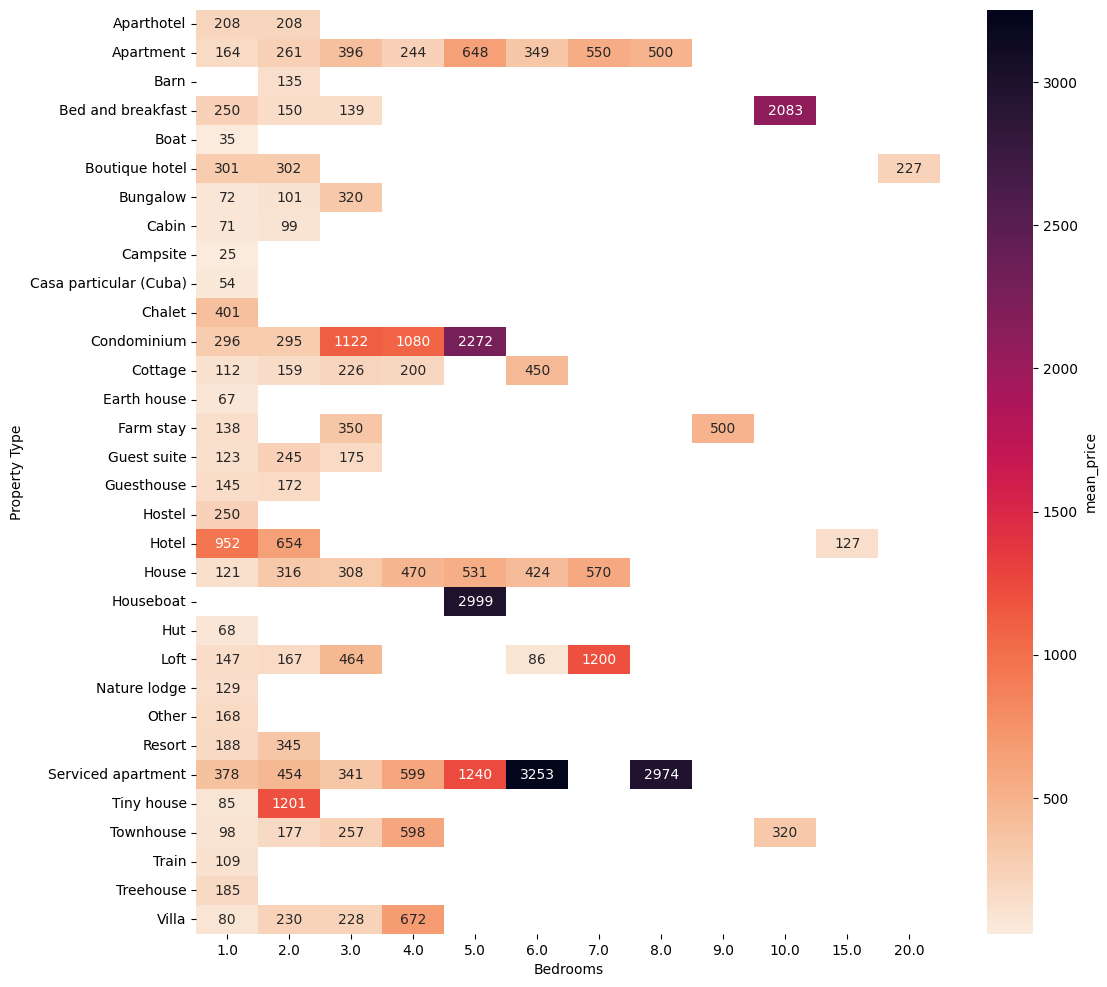

In [44]:
# Plotting a heatmap of prices with number of bedrooms for listings

plt.figure(figsize=(12,12))
sns.heatmap(price_df.groupby(['Property Type', 'Bedrooms']).Price.mean().unstack(),annot=True, fmt=".0f", cmap =sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})

In [45]:
# Number of bedrooms
print("Number of bedrooms :", len(price_df["Bedrooms"].unique()))
print()
print("BedRooms|Listings")
# Number of listings of each room type
print(price_df["Bedrooms"].value_counts())

Number of bedrooms : 12

BedRooms|Listings
Bedrooms
1.0     2451
2.0      837
3.0      312
4.0      114
5.0       20
6.0        8
7.0        4
10.0       2
8.0        2
20.0       1
15.0       1
9.0        1
Name: count, dtype: int64


insights:

Smaller listings (0 to 2 bedrooms) make up the majority of the available properties, likely catering to solo travelers, couples, or small families.

Medium-sized properties (3 to 4 bedrooms) are also fairly common and can accommodate families or small groups.

Larger properties (with 5 or more bedrooms) are quite rare, indicating that they cater to a more niche market, such as large families or groups looking for larger accommodations.

<Axes: xlabel='Property Type', ylabel='Country'>

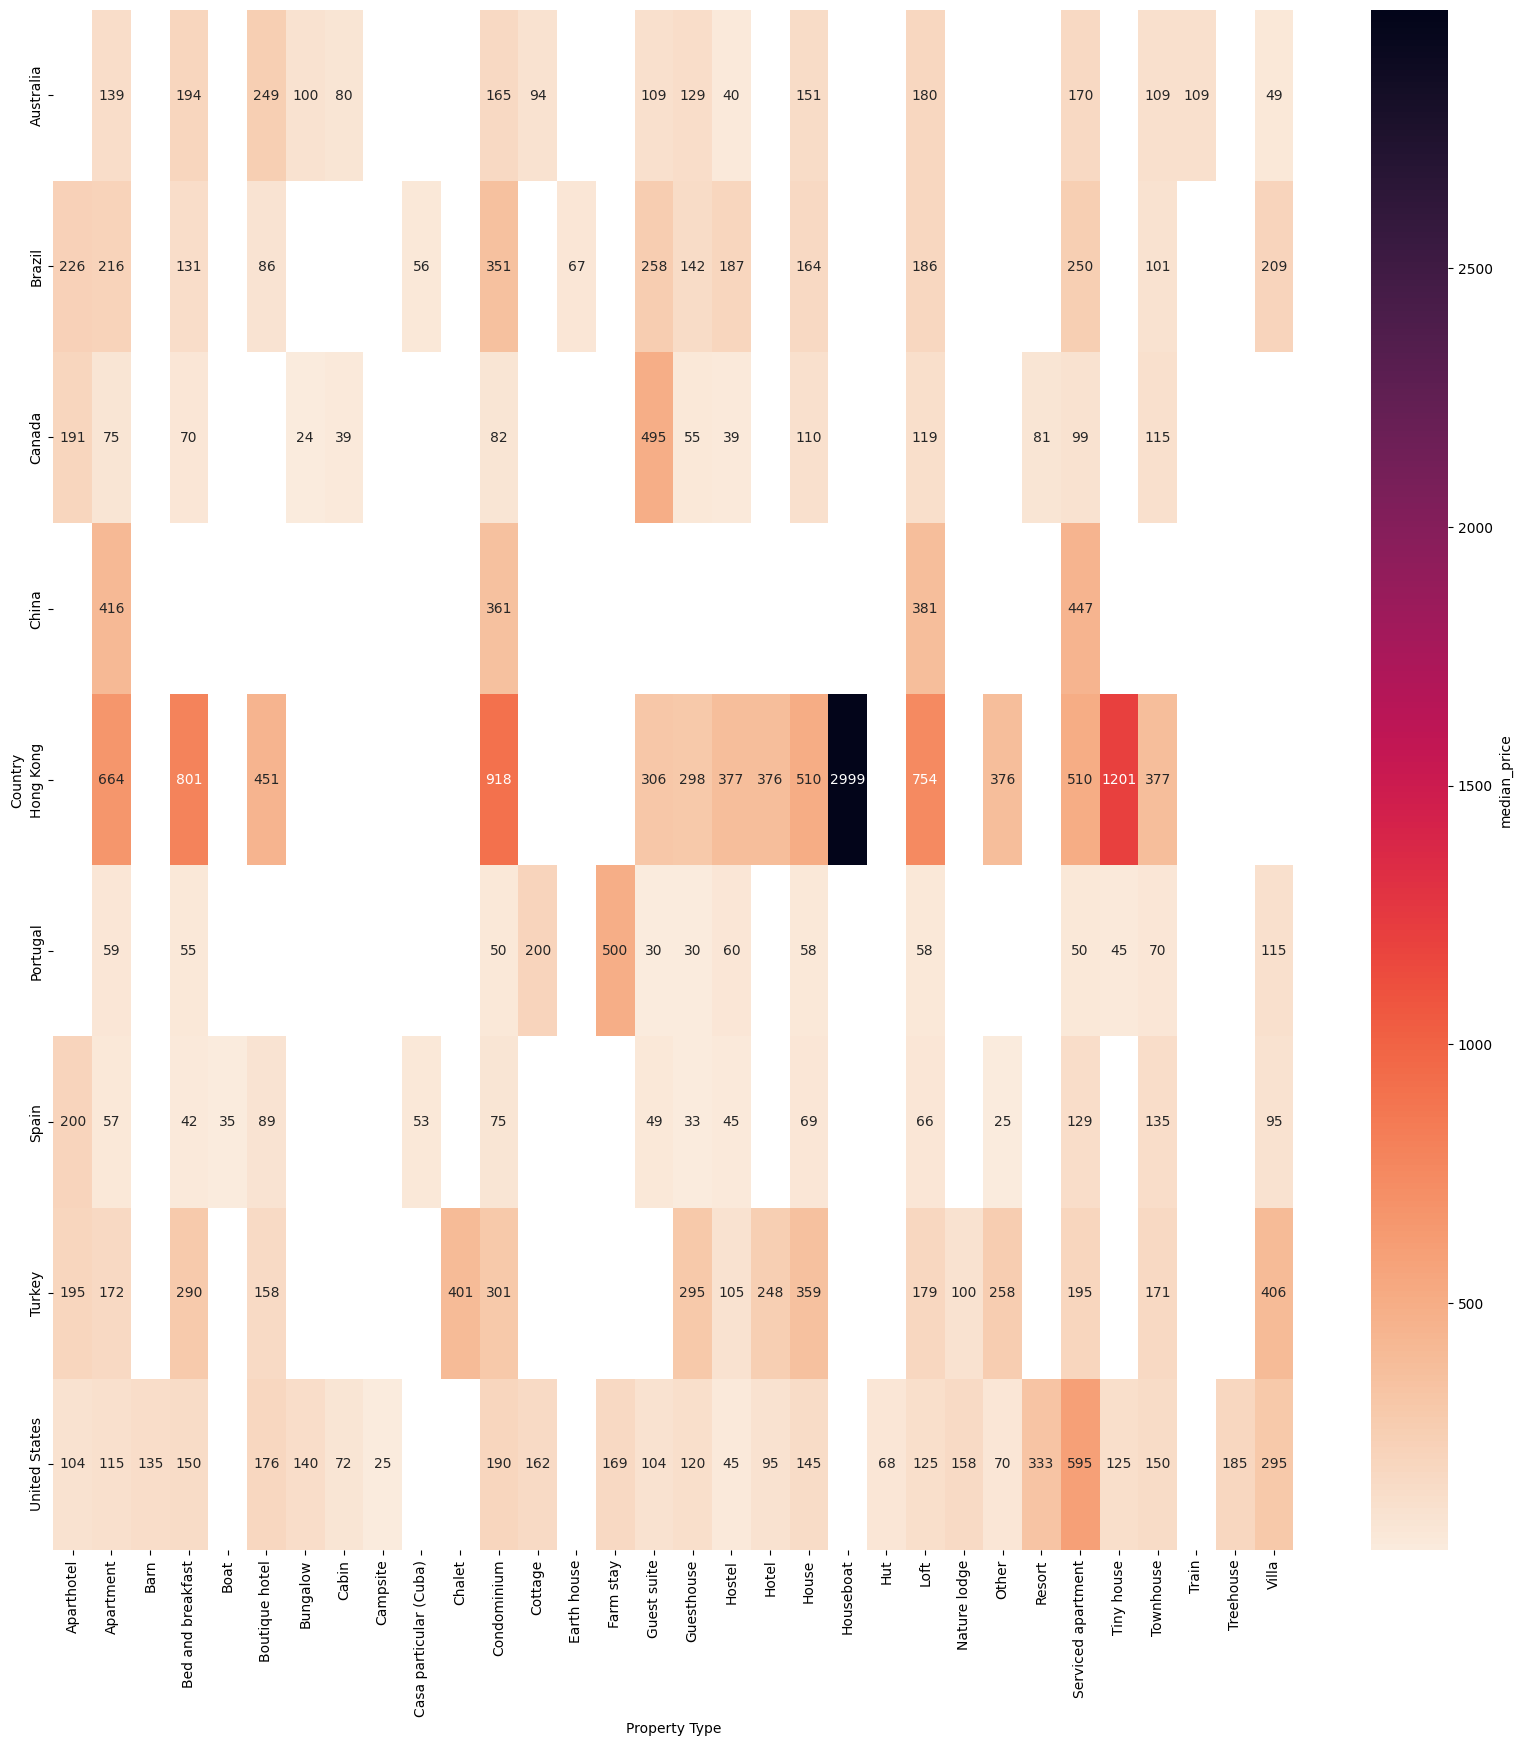

In [46]:
# Plotting a heatmap of the country vs property type with the median price

plt.figure(figsize=(20,20))
plt.tight_layout()
sns.heatmap(price_df.groupby([
        'Country', 'Property Type']).Price.median().unstack(),annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'median_price'})

In [47]:
#Geographical Clusters to find out which area in Boston has maximum listings on Airbnb

# seggregating each type of property

home = price_df[(price_df['Room Type'] == 'Entire home/apt')]
private = price_df[(price_df['Room Type'] == 'Private room')]
shared = price_df[(price_df['Room Type'] == 'Shared room')]

location_home = home[['Latitude', 'Longitude']]
location_private = private[['Latitude', 'Longitude']]
location_shared = shared[['Latitude', 'Longitude']]